In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
classes_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(X[index])
    plt.xlabel(classes_labels[y[index]])

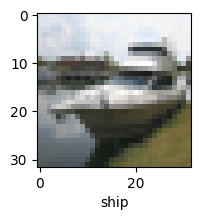

In [13]:
plot_sample(X_train, y_train, 1337)

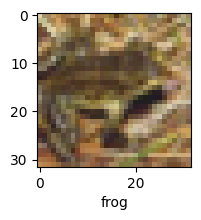

In [14]:
plot_sample(X_train, y_train, 228)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.8089 - accuracy: 0.3568
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.6232 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5417 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4807 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4308 - accuracy: 0.4961


In [18]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.4491 - accuracy: 0.4886


[1.449065923690796, 0.4885999858379364]

In [28]:
y_pred = ann.predict(X_test[0].reshape(1, 32, 32, 3))
np.argmax(y_pred[0])

1/1 [==============================] - 0s 32ms/step


3

In [35]:
def ann_predict(index):
    y_pred = ann.predict(X_test[index].reshape(1, 32, 32, 3))
    plt.figure(figsize=(10, 2))
    plt.imshow(X_test[index])
    plt.xlabel(f'pred: {classes_labels[np.argmax(y_pred[0])]}\nfact: {classes_labels[y_test[index][0]]}')

In [24]:
X_train[0].shape

(32, 32, 3)

In [23]:
X_test[0].shape

(32, 32, 3)

1/1 [==============================] - 0s 31ms/step


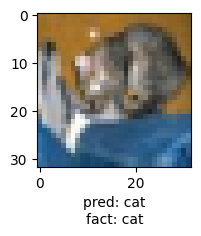

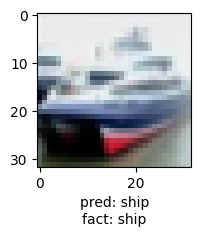

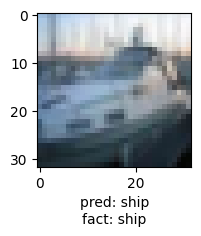

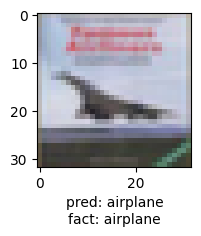

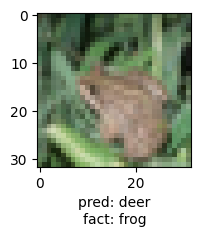

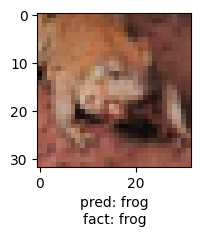

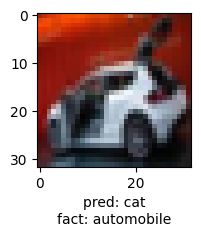

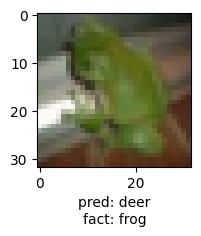

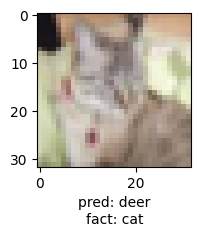

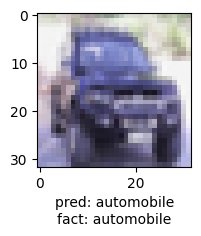

In [37]:
for i in range(10):
    ann_predict(i)

In [38]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.60      0.56      1000
           1       0.64      0.59      0.62      1000
           2       0.44      0.24      0.31      1000
           3       0.37      0.30      0.33      1000
           4       0.41      0.45      0.43      1000
           5       0.54      0.20      0.30      1000
           6       0.37      0.77      0.50      1000
           7       0.56      0.53      0.55      1000
           8       0.55      0.70      0.61      1000
           9       0.62      0.50      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [39]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4534 - accuracy: 0.4806
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1117 - accuracy: 0.6099
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9878 - accuracy: 0.6565
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8994 - accuracy: 0.6886
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8391 - accuracy: 0.7091


In [43]:
def cnn_predict(index):
    y_pred = cnn.predict(X_test[index].reshape(1, 32, 32, 3))
    plt.figure(figsize=(10, 2))
    plt.imshow(X_test[index])
    plt.xlabel(f'pred: {classes_labels[np.argmax(y_pred[0])]}\nfact: {classes_labels[y_test[index][0]]}')

1/1 [==============================] - 0s 40ms/step


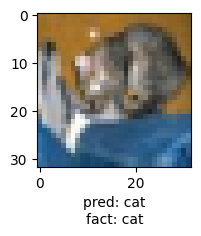

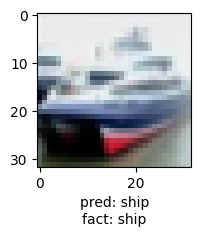

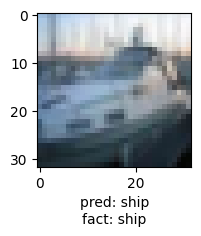

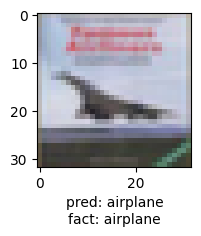

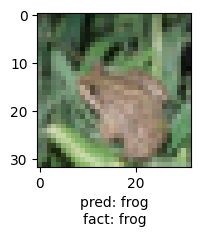

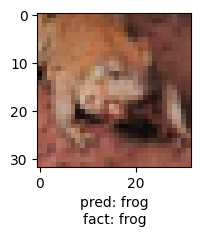

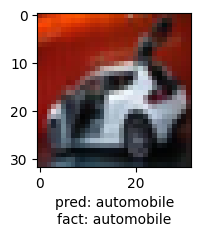

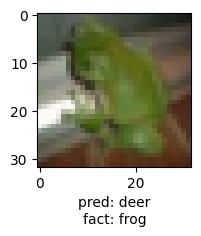

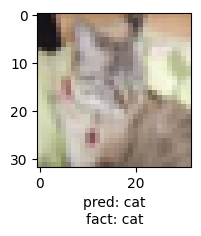

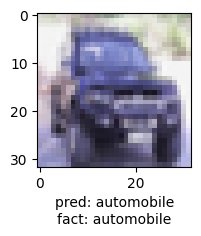

In [44]:
for i in range(10):
    cnn_predict(i)

In [45]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.72      1000
           1       0.79      0.83      0.81      1000
           2       0.69      0.40      0.50      1000
           3       0.53      0.42      0.47      1000
           4       0.49      0.76      0.60      1000
           5       0.61      0.57      0.59      1000
           6       0.65      0.83      0.73      1000
           7       0.75      0.72      0.74      1000
           8       0.83      0.69      0.75      1000
           9       0.82      0.69      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [46]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9490 - accuracy: 0.6703


[0.9490208029747009, 0.6703000068664551]

In [52]:
y_pred = [np.argmax(x) for x in y_pred]

Text(95.72222222222221, 0.5, 'Truth')

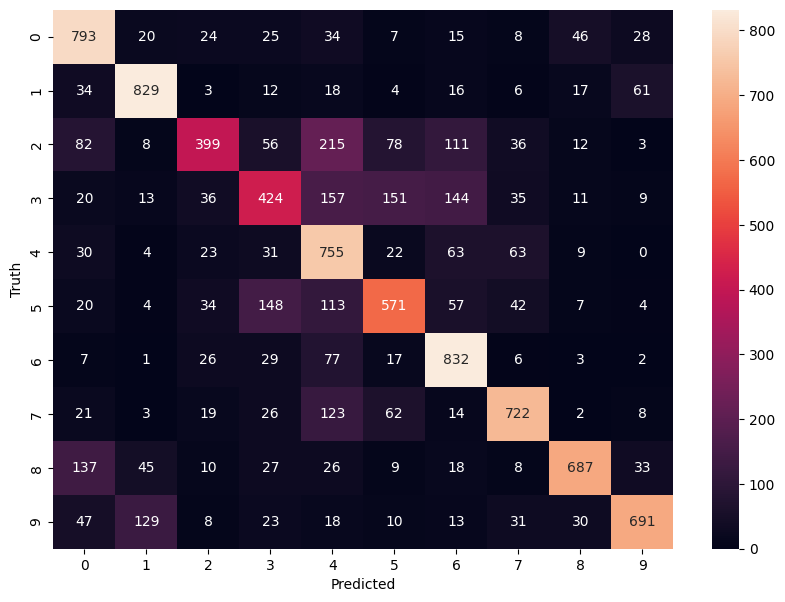

In [53]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test[:,0],predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')